In [1]:
import os

os.chdir("../..")

import utils

In [2]:
outputfolder = os.getcwd() + '/output/'
datafolder = os.getcwd() + '/datasets/PTB-XL/'
sampling_rate = 100
task = 'priority'
experiment_name = 'exp4'

data, raw_labels = utils.load_dataset(datafolder, sampling_rate=sampling_rate)
labels = utils.compute_label_aggregations(raw_labels, datafolder, task)
data, labels, Y, _ = utils.select_data(data, labels, task, 0, outputfolder+experiment_name+'/data/')

In [3]:
X_test = data[labels.strat_fold == 10]
y_test = Y[labels.strat_fold == 10]

X_val = data[labels.strat_fold == 9]
y_val = Y[labels.strat_fold == 9]

X_train = data[labels.strat_fold <= 8]
y_train = Y[labels.strat_fold <= 8]

n_classes = y_train.shape[1]

print(f"This experiment has {n_classes} classes")

X_train = X_train[:,:,0]
X_test = X_test[:,:,0]
X_val = X_val[:,:,0]

This experiment has 43 classes


In [6]:
X_train[y_train[:,8]==1].shape

(428, 1000)

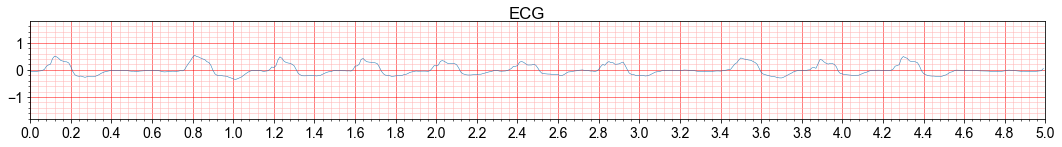

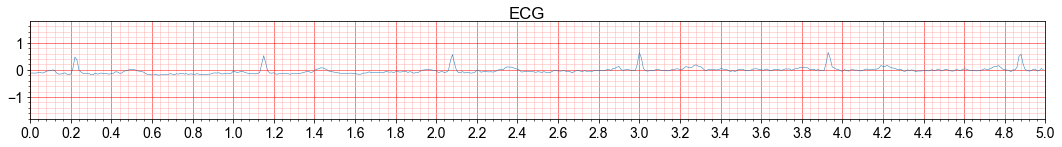

In [7]:
import matplotlib.pyplot as plt
import ecg_plot

ecg_plot.plot_1(X_train[y_train[:,8]==1][220][:500], sample_rate=100)
ecg_plot.plot_1(X_train[y_train[:,8]==0][0][:500], sample_rate=100)


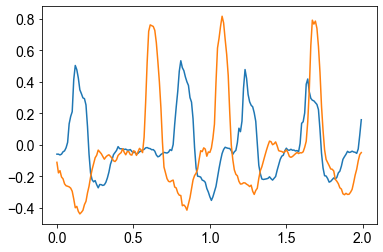

In [8]:
t = [i/100 for i in range(200)]

plt.plot(t, X_train[y_train[:,8]==1][220][:200])
plt.plot(t, X_train[y_train[:,8]==1][-1][:200])

In [9]:
# for i in range(428):
#     plt.plot(t, X_train[y_train[:,8]==1][i][:200])
#     plt.title(i)
#     plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

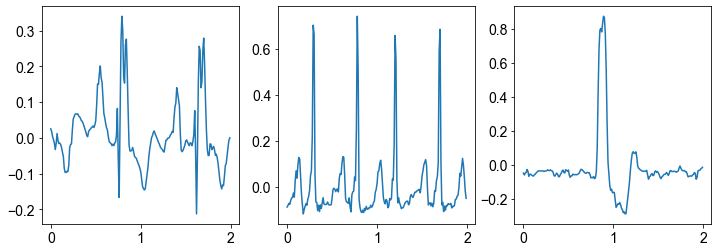

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.plot(t, X_train[y_train[:,8]==1][398][:200])
ax2.plot(t, X_train[y_train[:,8]==1][392][:200])
ax3.plot(t, X_train[y_train[:,8]==1][401][:200])
ax1.ylabel("Amplitude (mV)")

In [ ]:
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

# Plot the data on each subplot
ax1.plot(t, X_train[y_train[:, 8] == 1][398][:200])
ax2.plot(t, X_train[y_train[:, 8] == 1][392][:200])
ax3.plot(t, X_train[y_train[:, 8] == 1][401][:200])

# Find the minimum and maximum y-values across all subplots
all_y_data = np.concatenate([X_train[y_train[:, 8] == 1][398][:200],
                              X_train[y_train[:, 8] == 1][392][:200],
                              X_train[y_train[:, 8] == 1][401][:200]])
y_min = all_y_data.min()
y_max = all_y_data.max()
y_range = y_max - y_min
y_min -= 0.02 * y_range  # 10% padding at the bottom
y_max += 0.02 * y_range  # 10% padding at the top

# Set the same y-limits for all subplots
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(y_min, y_max)

# Add axis labels
ax1.set_ylabel("Amplitude (mV)")
ax1.set_xlabel("Time (s)")
ax2.set_xlabel("Time (s)")
ax3.set_xlabel("Time (s)")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\clbb_img.png", dpi=1000)

NameError: name 'plt' is not defined

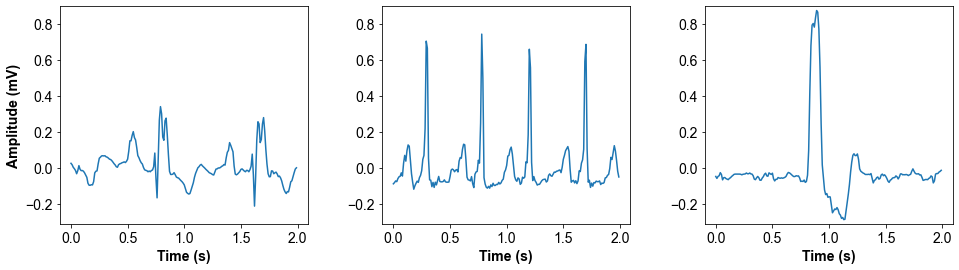

In [12]:
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

# Plot the data on each subplot
ax1.plot(t, X_train[y_train[:, 8] == 1][398][:200])
ax2.plot(t, X_train[y_train[:, 8] == 1][392][:200])
ax3.plot(t, X_train[y_train[:, 8] == 1][401][:200])

# Find the minimum and maximum y-values across all subplots
all_y_data = np.concatenate([X_train[y_train[:, 8] == 1][398][:200],
                              X_train[y_train[:, 8] == 1][392][:200],
                              X_train[y_train[:, 8] == 1][401][:200]])
y_min = all_y_data.min()
y_max = all_y_data.max()
y_range = y_max - y_min
y_min -= 0.02 * y_range  # 10% padding at the bottom
y_max += 0.02 * y_range  # 10% padding at the top

# Set the same y-limits for all subplots
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(y_min, y_max)

# Add axis labels
ax1.set_ylabel("Amplitude (mV)", fontsize=14, fontweight='bold')  # Increase font size
ax1.set_xlabel("Time (s)", fontsize=14, fontweight='bold')  # Increase font size
ax2.set_xlabel("Time (s)", fontsize=14, fontweight='bold')  # Increase font size
ax3.set_xlabel("Time (s)", fontsize=14, fontweight='bold')  # Increase font size

plt.subplots_adjust(wspace=0.3)
# Adjust the spacing between subplots

# Display the plot
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\clbb_img.png", dpi=1000, bbox_inches='tight')